In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('midterm_parttwo.csv')
data.head()

,Years of Education after High School,Requested Credit Amount,Number of Dependents,Monthly Income,Monthly Expense,Marital Status,Credit Rating
0,1,Low,No dependent,Very low,Very low,Married,Positive
1,2,Low,No dependent,Very low,Very low,Single,Positive
2,1,Low,No dependent,Very low,Very low,Single,Positive
3,3,Low,No dependent,Very low,Very low,Married,Positive
4,3,Low,No dependent,Very low,Very low,Single,Negative


In [6]:
data.columns = data.columns.str.strip().str.lower()

In [9]:
print(data.columns)

Index(['years of education after high school', 'requested credit amount',
       'number of dependents', 'monthly income', 'monthly expense',
       'marital status', 'credit rating'],
      dtype='object')


In [11]:
data.head()

,years of education after high school,requested credit amount,number of dependents,monthly income,monthly expense,marital status,credit rating
0,1,Low,No dependent,Very low,Very low,Married,Positive
1,2,Low,No dependent,Very low,Very low,Single,Positive
2,1,Low,No dependent,Very low,Very low,Single,Positive
3,3,Low,No dependent,Very low,Very low,Married,Positive
4,3,Low,No dependent,Very low,Very low,Single,Negative


In [18]:
dependent_var = 'credit rating'  

In [19]:
X = data.drop([dependent_var], axis=1) 
categorical_vars = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_vars) 


In [20]:
# Encode the target variable
y = LabelEncoder().fit_transform(data[dependent_var])

In [21]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Fit a logistic regression model
model = LogisticRegression(max_iter=1000, solver='liblinear') 
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [22]:
# Initial Model Evaluation
y_pred = model.predict(X_test)
print(f'Initial Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted")}')

Initial Confusion Matrix:
[[   0  577]
 [   0 3464]]
Recall: 0.8572135609997525
Precision: 0.7348150891618765
F1 Score: 0.7913092006137622


C:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Adjusting the Decision Threshold for 15% Approval
y_pred_probs = model.predict_proba(X_test)[:, 1]
threshold = np.percentile(y_pred_probs, 85)  
y_pred_adjusted = (y_pred_probs >= threshold).astype(int)

In [24]:
# Evaluation with Adjusted Threshold
print(f'Adjusted Confusion Matrix:\n{confusion_matrix(y_test, y_pred_adjusted)}')
print(f'Adjusted Recall: {recall_score(y_test, y_pred_adjusted, average="weighted")}')
print(f'Adjusted Precision: {precision_score(y_test, y_pred_adjusted, average="weighted")}')
print(f'Adjusted F1 Score: {f1_score(y_test, y_pred_adjusted, average="weighted")}')


Adjusted Confusion Matrix:
[[ 495   82]
 [2939  525]]
Adjusted Recall: 0.2524127691165553
Adjusted Precision: 0.7619942621668829
Adjusted F1 Score: 0.25633686495439034


In [25]:
# Visualization
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

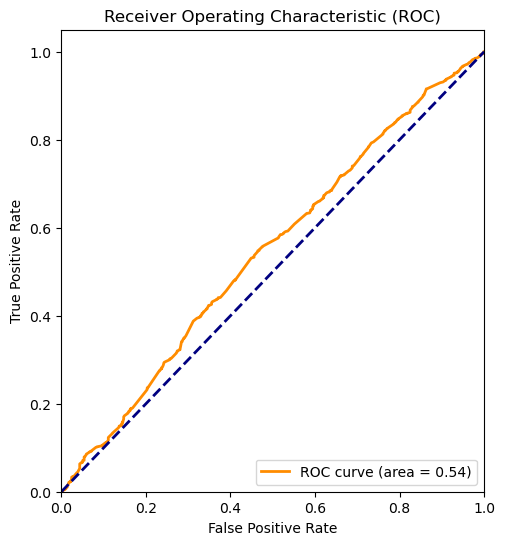

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")


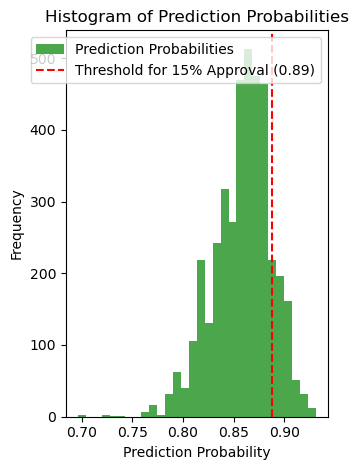

In [27]:
plt.subplot(1, 2, 2)
plt.hist(y_pred_probs, bins=30, color='green', alpha=0.7, label='Prediction Probabilities')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold for 15% Approval ({threshold:.2f})')
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Probabilities')
plt.legend()

plt.tight_layout()
plt.show()